# Naive Bayes + NLP + Pipeline

    Feature Engineering | Pipeline | Naive-Bayes Classifiers | pipeline
    
### nltk+sklearn+[UCI datasets](https://archive.ics.uci.edu/ml/datasets.html) example

    nltk.download_shel()
    >> l
    >> d
    >> package (stopword)
    
   

In [1]:
import nltk
#nltk.download_shell()

## Data Overview

In [34]:
messages = [line.rstrip() for line in open('data/smsspamcollection/SMSSpamCollection')]

In [35]:
# num of messages
len(messages)

5574

In [37]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [27]:
[ messages[i].split()[0] for i in range(10) ]

['ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam']

In [154]:
import pandas as pd

In [155]:
messages = pd.read_csv("data/smsspamcollection/SMSSpamCollection",
                       sep = '\t', #\t is tab
                       names = ['label','message'])

In [156]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [157]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


> There are some duplicate messages ...

In [158]:
messages["len"] = messages.message.apply(len)

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

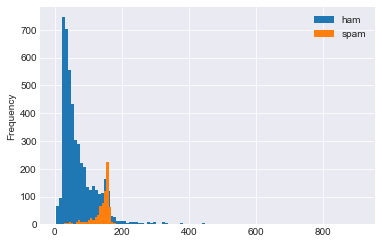

In [160]:
fig = plt.figure()
ax = fig.add_axes()
messages[messages.label == "ham"]['len'].plot(kind = "hist", bins = 100,ax = ax,label = "ham")
messages[messages.label == "spam"]['len'].plot(kind = "hist", bins = 30,ax = ax,label = "spam")
plt.legend()

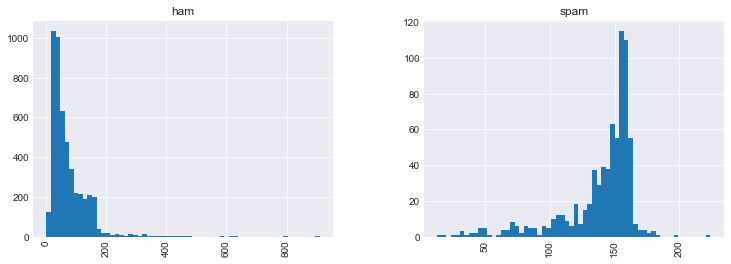

In [161]:
messages.hist(column = "len",by = "label",bins = 60, figsize = (12,4));

## Preprocess 

    Clean | Vectorization | TF-IDF

  Basically, we will do removing punctuation and stop words below

   There are a lot of ways to continue normalizing this text. Such as [Stemming](https://en.wikipedia.org/wiki/Stemming) or distinguishing by [part of speech](http://www.nltk.org/book/ch05.html).

   NLTK has lots of built-in tools and great documentation on a lot of these methods. Sometimes they don't work well for text-messages due to the way a lot of people tend to use abbreviations or shorthand, For example:
    
        'Nah dawg, IDK! Wut time u headin to da club?'
    
   versus

        'No dog, I don't know! What time are you heading to the club?'
    
   Some text normalization methods will have trouble with this type of shorthand and so I'll leave you to explore those more advanced methods through the [NLTK book online](http://www.nltk.org/book/).
   
   https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html

In [162]:
import string

In [163]:
# remove punctuation
print string.punctuation
print
# ex.
test = "hi! yo, L^^nyy"
print "before:", test
print 
print "after:: ", "".join(char for char in test if char not in string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

before: hi! yo, L^^nyy

after::  hi yo Lnyy


In [95]:
# import the corpus 
from nltk.corpus import stopwords

In [164]:
"""
Common words always show up in English
We probablly want to ignore these words 
"""
stopwords.words("english")[:5]

[u'i', u'me', u'my', u'myself', u'we']

In [103]:
def text_preprocess(mess):
    """
    remove punc
    remove stop words
    return list of clean text
    """
    nopunc = "".join(s for s in mess if s not in string.punctuation)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words("english")]

messages.head().message.apply(text_preprocess)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

- ### 1. Vectorization

   We'll do that in three steps using the bag-of-words model:

    1. Count how many times does a word occur in each message (term frequency) 
    
            from sklearn.feature_extraction.text import CountVectorizer
            
                CountVectorizer().fit()
                
                CountVectorizer().transform()

    2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

    3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

In [104]:
from sklearn.feature_extraction.text import CountVectorizer

In [190]:
"""
fit a string list
analyzer will return a list of words we want to extract from row string
and CountVectorizer will count this a features
"""
bow_transformer = CountVectorizer(analyzer=text_preprocess).fit(messages.message)
# Print total number of vocabulary words
print(len(bow_transformer.vocabulary_))

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


11425


    CountVectorizer.vocabulary_ : dictionary( vocab, id)
    
    CountVectorizer.get_feature_names() : list( id, vocab )

In [202]:
# each id is correspond to a word
def check_trans(n = 6):
    count = 0
    for k,v in bow_transformer.vocabulary_.iteritems():
        yield k, v
        count += 1
        if count == n:
            break
for i in check_trans():
    print i
    

bow_transformer.get_feature_names()[3832]

('Sympathetic', 3832)
('raining', 9182)
('EXPLAIN', 1751)
('GMGNGEGNT', 1991)
('yellow', 11293)
('Sugar', 3809)


'Sympathetic'

In [309]:
"""
Then we want to call transformer.transform(list)
to get the vector of our data
"""
test = "already u"
check = bow_transformer.transform([test]) # input list of string
print check ,".... only print the feature and value which the single data fires on"
print check.shape , "... which is the vocabulary_ size"

message_vec = bow_transformer.transform(messages.message)

  (0, 4629)	1
  (0, 10698)	1 .... only print the feature and value which the single data fires on
(1, 11425) ... which is the vocabulary_ size


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [207]:
print 'Shape of Sparse Matrix: ', message_vec.shape
print 'Amount of Non-Zero occurences: ', message_vec.nnz # non-Zero
sparsity = (100.0 * message_vec.nnz / (message_vec.shape[0] * messages_bow.shape[1]))
print 'sparsity: {}'.format(round(sparsity, 4))

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548
sparsity: 0.0794


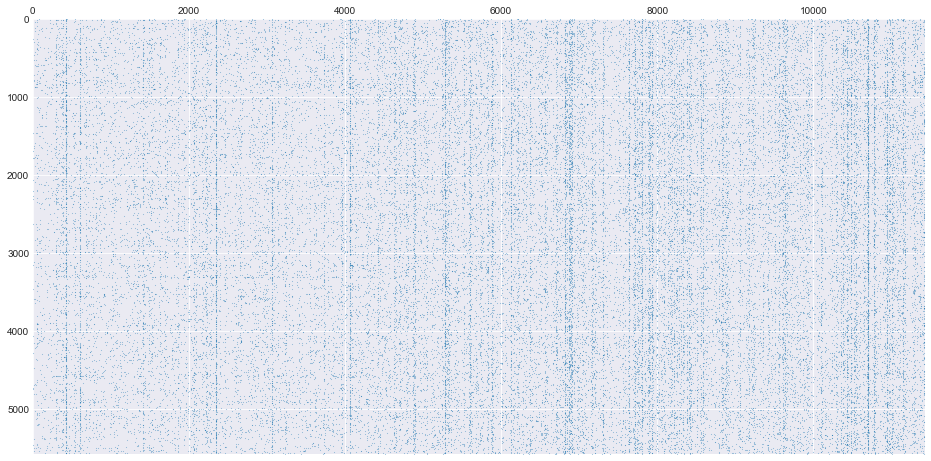

In [235]:
plt.figure(figsize=(16,8))
plt.spy(message_vec,markersize=0.1)

- ### 2,3. TF-IDF

        from sklearn.feature_extraction.text import TfidfTransformer
        
     mathematically, ** TF -IDF ** is pxpressed as below
   
   $$ w_{x,y} = tf_{x,y} \times \log (D/df_{x})$$
   
   ***
   #### More detail about TF-IDF
    TF-IDF stands for *term frequency-inverse document frequency*, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

    One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

    Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

    **TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

    *TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

    **IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

    *IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

    See below for a simple example.

    **Example:**

    Consider a document containing 100 words wherein the word cat appears 3 times. 

    The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.
____


In [236]:
from sklearn.feature_extraction.text import TfidfTransformer

In [237]:
"""
input the matrix 
return the idf vector (global term weights)
like a normalization
"""
tfidf_trans = TfidfTransformer().fit(message_vec)

In [294]:
print "the vocab appear most:" ,message_vec.sum(axis=0).argmax()
max_, idx = 0,0
dic = {}
for i in message_vec.nonzero()[1]:
    dic[i] = dic.get(i,0) + 1
    if dic[i] >  max_:
        max_ = dic[i]
        idx = i
print "most frequent word apper in document", idx,",", max_, "times"
bow_transformer.get_feature_names()[10698]

the vocab appear most: 10698
most frequent word apper in document 10698 , 569 times


'u'

In [314]:
#ex1.
tfidf_check = tfidf_trans.transform(check) 
print check
print
print tfidf_check

#ex2.
#print "IDF = ", np.log2(5572/569)
"""
Key idea: 
    idf is smaller if it's a common words in all documents
"""
print tfidf_trans.idf_[bow_transformer.vocabulary_['u']] # inverse document frequency
print tfidf_trans.idf_[bow_transformer.vocabulary_['already']] 

  (0, 4629)	1
  (0, 10698)	1

  (0, 10698)	0.535619486495
  (0, 4629)	0.844459451772
3.28005242674
5.17134149132


In [316]:
messages_tfidf = tfidf_trans.transform(message_vec) 

<5572x11425 sparse matrix of type '<type 'numpy.float64'>'
	with 50548 stored elements in Compressed Sparse Row format>

## Fit Train data

    from sklearn.naive_bayes import MultinomialNB

In [317]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split

In [137]:
spam_detect_model = MultinomialNB()

In [320]:
msg_train, msg_test, label_train, label_test = train_test_split(messages_tfidf, messages.label, 
                                                                test_size=0.3, random_state=42)
spam_detect_model.fit(msg_train,label_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predict / Evaluation

In [321]:
pred = spam_detect_model.predict(msg_test)

In [322]:
pred

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'],
      dtype='|S4')

In [323]:
from sklearn.metrics import confusion_matrix, classification_report

In [325]:
print confusion_matrix(label_test,pred)
print 
print classification_report(label_test,pred)

[[1448    0]
 [  58  166]]

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1448
       spam       1.00      0.74      0.85       224

avg / total       0.97      0.97      0.96      1672



> However, it turns out actually, in the vectorizing step, we also use the test data to normalize the weight of each count. In reality, we won't see these data in train, therefore, we should **only fit and transform on train data!** Therefore, we need to **split the data before we preprocess them.**

> Below, I'm going to introduce a new clean way to do what we have done before. Therefore, we don't need to do anything again line by line. It's also known as pipeline

***

## [Pipeline](http://scikit-learn.org/stable/modules/pipeline.html)

    from sklearn.pipeline import Pipeline

In [337]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

pipeline1 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_preprocess)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline2 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_preprocess)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier(n_estimators=20)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [338]:
from sklearn.cross_validation import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(messages.message, messages.label, 
                                                                test_size=0.3, random_state=42)

In [340]:
pipeline1.fit(msg_train,label_train)
predictions1 = pipeline1.predict(msg_test)
print confusion_matrix(label_test,predictions1)
print 
print classification_report(label_test,predictions1)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


[[1448    0]
 [  60  164]]

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1448
       spam       1.00      0.73      0.85       224

avg / total       0.97      0.96      0.96      1672



In [341]:
pipeline2.fit(msg_train,label_train)
predictions2 = pipeline2.predict(msg_test)
print confusion_matrix(label_test,predictions2)
print 
print classification_report(label_test,predictions2)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


[[1448    0]
 [  43  181]]

             precision    recall  f1-score   support

        ham       0.97      1.00      0.99      1448
       spam       1.00      0.81      0.89       224

avg / total       0.98      0.97      0.97      1672

